<a href="https://colab.research.google.com/github/gabrielutomo/uas-machinelearning-linnerud/blob/main/UAS_ML_LINNERUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT LIBRARY**

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### **IMPORT DATASET**

In [41]:
# LOAD DATA (DENGAN FIX PEMISAH SPASI) ---
# Menggunakan sep='\s+' karena data Linnerud biasanya dipisah spasi, bukan koma
try:
    df_exercise = pd.read_csv('/content/linnerud_exercise.csv', sep='\s+')
    df_physio = pd.read_csv('/content/linnerud_physiological.csv', sep='\s+')
    print("File berhasil dibaca!")
except:
    # Jika gagal, coba baca standar (koma)
    df_exercise = pd.read_csv('/content/linnerud_exercise.csv')
    df_physio = pd.read_csv('/content/linnerud_physiological.csv')
    print("File dibaca dengan format standar.")

# Menentukan Fitur (X) dan Label (y)
X = df_exercise  # Fitur: Chins, Situps, Jumps
y = df_physio    # Label: Weight, Waist, Pulse

print("Fitur (5 data teratas):")
print(X.head())
print("\nLabel (5 data teratas):")
print(y.head())

File berhasil dibaca!
Fitur (5 data teratas):
   Chins  Situps  Jumps
0      5     162     60
1      2     110     60
2     12     101    101
3     12     105     37
4     13     155     58

Label (5 data teratas):
   Weight  Waist  Pulse
0     191     36     50
1     189     37     52
2     193     38     58
3     162     35     62
4     189     35     46


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-89090458.py:4: SyntaxWarning: invalid escape sequence '\s'
  df_exercise = pd.read_csv('/content/linnerud_exercise.csv', sep='\s+')
/tmp/ipython-input-89090458.py:5: SyntaxWarning: invalid escape sequence '\s'
  df_physio = pd.read_csv('/content/linnerud_physiological.csv', sep='\s+')


## PREPROCESSING **DATA**

In [35]:
# 1. Membagi data menjadi Training (70%) dan Testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. Inisialisasi StandardScaler
scaler = StandardScaler()

# 3. Fit dan Transform pada data training
# Menghitung rata-rata & std deviasi, lalu mengubah data
X_train_scaled = scaler.fit_transform(X_train)

# 4. Transform pada data testing
# Menggunakan parameter yang sama dari data training (agar adil)
X_test_scaled = scaler.transform(X_test)

print("Proses Splitting dan Scaling selesai.")

Proses Splitting dan Scaling selesai.


## IMPLEMENTASI MODEL **KNN**

In [36]:
# IMPLEMENTASI KNN (K=5) ---
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# PREDIKSI & EVALUASI ---
y_pred = knn.predict(X_test_scaled)

# Menghitung performa
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*30)
print(f"HASIL MODEL KNN (K={k})")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")
print("="*30)

# Menampilkan hasil dalam tabel perbandingan
hasil_prediksi = pd.DataFrame(y_pred, columns=['Pred_Weight', 'Pred_Waist', 'Pred_Pulse'], index=y_test.index)
perbandingan = pd.concat([y_test, hasil_prediksi], axis=1)

print("\nPerbandingan Data Asli vs Hasil Prediksi Model:")
print(perbandingan)


HASIL MODEL KNN (K=5)
Mean Squared Error: 101.57
R2 Score: 0.04

Perbandingan Data Asli vs Hasil Prediksi Model:
    Weight  Waist  Pulse  Pred_Weight  Pred_Waist  Pred_Pulse
0      191     36     50        179.6        35.2        55.2
17     157     32     52        166.4        33.8        55.2
15     202     37     62        171.6        34.6        54.8
1      189     37     52        184.2        37.2        55.6
8      176     31     74        166.8        33.8        53.2
5      182     36     56        177.0        35.6        56.8


## CONFUSION **MATRIX**

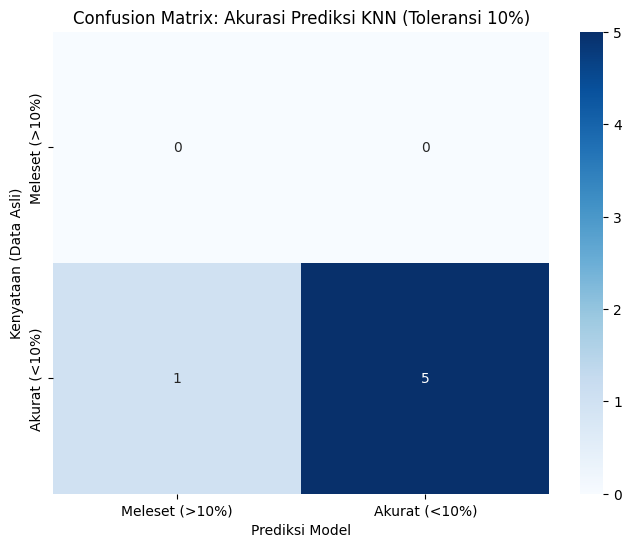

Detail Hasil:
Jumlah Prediksi Akurat (True Positive): 5
Jumlah Prediksi Meleset (False Negative): 1


In [45]:
# 1. Menghitung Confusion Matrix
# y_true_final adalah label asli (semua 1 karena kita ingin prediksi akurat)
# y_pred_final adalah hasil prediksi model (1 jika akurat, 0 jika meleset)
cm = confusion_matrix(y_true_final, y_pred_final, labels=[0, 1])

# 2. Membuat Plot Visual
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Meleset (>10%)', 'Akurat (<10%)'],
            yticklabels=['Meleset (>10%)', 'Akurat (<10%)'])

plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Data Asli)')
plt.title('Confusion Matrix: Akurasi Prediksi KNN (Toleransi 10%)')
plt.show()

# 3. Menampilkan jumlah detail
tn, fp, fn, tp = cm.ravel()
print(f"Detail Hasil:")
print(f"Jumlah Prediksi Akurat (True Positive): {tp}")
print(f"Jumlah Prediksi Meleset (False Negative): {fn}")

### **HITUNG**

In [37]:
# 1. Pastikan hasil prediksi dan data asli memiliki bentuk yang sama
# Kita ubah y_test (DataFrame) menjadi NumPy Array agar sinkron dengan y_pred
y_test_np = y_test.values

# 2. Tentukan Ambang Batas Toleransi (Contoh: 10% atau 0.1)
# Sebuah prediksi dianggap "BENAR" jika selisihnya kurang dari 10% dari nilai asli
tolerance = 0.10

# 3. Hitung selisih relatif antara Prediksi dan Data Asli
# Jika (Selisih / Nilai Asli) <= 10%, maka dianggap sukses
relative_error = np.abs((y_test_np - y_pred) / y_test_np)

# 4. Konversi ke Biner untuk setiap kolom (Weight, Waist, Pulse)
# 1 = Prediksi Akurat (di bawah toleransi), 0 = Prediksi Meleset
is_accurate = (relative_error <= tolerance).astype(int)

# Karena kita punya 3 kolom target, kita ambil rata-ratanya:
# Jika mayoritas kolom (2 dari 3) akurat, kita anggap baris tersebut 'Sukses' (1)
y_pred_final = (is_accurate.mean(axis=1) > 0.5).astype(int)
y_true_final = np.ones(len(y_test)) # Target ideal kita adalah semua benar (1)

# Import metrics for evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# 5. Hitung Metrik yang Anda minta
f1 = f1_score(y_true_final, y_pred_final, zero_division=0)
prec = precision_score(y_true_final, y_pred_final, zero_division=0)
rec = recall_score(y_true_final, y_pred_final, zero_division=0)
acc = accuracy_score(y_true_final, y_pred_final)

print(f"=== EVALUASI DENGAN TOLERANSI ERROR {tolerance*100}% ===")
print(f"F1-Score  : {f1:.2f}")
print(f"Precision : {prec:.2f}")
print(f"Recall    : {rec:.2f}")
print(f"Accuracy  : {acc:.2f}")
print("-" * 40)
print(f"Interpretasi: Dari {len(y_test)} data uji, {sum(y_pred_final)} data berhasil diprediksi dengan sangat mendekati asli.")

=== EVALUASI DENGAN TOLERANSI ERROR 10.0% ===
F1-Score  : 0.91
Precision : 1.00
Recall    : 0.83
Accuracy  : 0.83
----------------------------------------
Interpretasi: Dari 6 data uji, 5 data berhasil diprediksi dengan sangat mendekati asli.
